In [3]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D
from keras.layers import Dropout, MaxPooling2D, Flatten

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_data = (None, 32,32,3)

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.build(input_data)
model.summary()
          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
__________

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} Test Acc: {1}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 133us/step
Test Loss: 0.7098687420845031 Test Acc: 0.7656


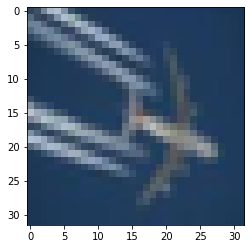

In [16]:
import matplotlib.pyplot as plt

number = 1203
(trainx, trainy), (testx, testy) = cifar10.load_data()
plt.imshow(testx[number])

In [17]:
predictions = model.predict([x_test])
i = np.argmax(predictions[number])
categories = ["airplane", "automobile", "bird", "cat", 
              "deer", "dog", "frog", "horse", "ship", "truck"]
print(categories[i])

airplane
